In [1]:
import tensorflow as tf
print(tf.__version__)

2024-02-18 16:10:52.851769: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-18 16:10:52.851885: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-18 16:10:53.120102: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-18 16:10:53.561405: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-18 16:10:55.240428: W tensorflow/compiler/tf2

2.15.0


In [2]:
print(tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True


2024-02-18 16:10:57.577118: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 16:10:58.376328: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 16:10:58.376603: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-02-18 16:10:58.517750: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 16:10:58.518007: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 16:10:58.518186: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [4]:
!pip install pandas
!pip install -U scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


## Creating Data

In [5]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [6]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [7]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [8]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0],"X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


(array([ 7.54246251e-01, -7.56158882e-01, -8.15391934e-01, -3.93730729e-01,
         4.42207645e-01, -4.79646368e-01, -1.36483595e-02,  7.71513274e-01,
        -1.69322340e-01, -1.21485796e-01, -6.42490416e-01,  5.69466604e-01,
        -1.17735911e-01,  7.34100038e-01,  6.00776333e-01,  1.90225707e-01,
        -9.36951846e-01,  1.07061696e-01, -8.18913619e-01, -6.42100130e-01,
         6.26827199e-01, -5.62291360e-01, -2.12666579e-02,  7.39770578e-01,
        -9.09048393e-01, -9.36994111e-01,  2.86615780e-01,  8.26260717e-01,
         2.53433397e-01,  6.57946255e-01, -3.14834779e-01, -2.23989601e-01,
         8.44389246e-03,  1.00503887e+00, -8.95158198e-02, -7.88574473e-01,
        -5.68205362e-01,  4.47646782e-01,  2.63260719e-01,  7.45020435e-01,
        -5.97118971e-01,  3.61928379e-01, -7.14242507e-01,  8.33839377e-01,
        -8.33981856e-01, -9.10860642e-01,  4.87625557e-01,  2.30736878e-01,
         7.58412791e-01, -4.12746839e-01,  4.76176622e-01,  3.99958509e-02,
        -9.6

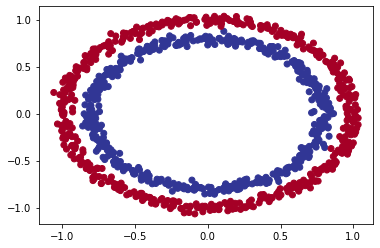

In [9]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1],c=y, cmap=plt.cm.RdYlBu);
X[:, 0], X[:, 1]

In [10]:
X.shape, y.shape

((1000, 2), (1000,))

In [11]:
len(X), len(y)

(1000, 1000)

In [12]:
X[17], y[10]

(array([ 0.1070617, -0.7930922]), 1)

In [13]:
#Model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
               metrics=["accuracy"])

model_1.fit(X, y, epochs=50)

Epoch 1/50


2024-02-18 16:11:03.674183: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 16:11:03.674773: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-18 16:11:03.674967: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

32/32 [==============================] - 5s 6ms/step - loss: 7.4507 - accuracy: 0.5010
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 7.6226 - accuracy: 0.5000
Epoch 3/50
32/32 [==============================] - 0s 4ms/step - loss: 7.5638 - accuracy: 0.5040
Epoch 4/50
32/32 [==============================] - 0s 4ms/step - loss: 7.2286 - accuracy: 0.5260
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 6.4366 - accuracy: 0.5780
Epoch 6/50
32/32 [==============================] - 0s 4ms/step - loss: 6.9212 - accuracy: 0.5470
Epoch 7/50
32/32 [==============================] - 0s 4ms/step - loss: 6.7502 - accuracy: 0.5570
Epoch 8/50
32/32 [==============================] - 0s 4ms/step - loss: 6.8317 - accuracy: 0.5520
Epoch 9/50
32/32 [==============================] - 0s 4ms/step - loss: 6.8774 - accuracy: 0.5490
Epoch 10/50
32/32 [==============================] - 0s 4ms/step - loss: 6.8774 - accuracy: 0.5490
Epoch 11/50
32/32 [===========

In [14]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1321 (5.16 KB)
Trainable params: 1321 (5.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.8289 - accuracy: 0.4900


[7.828946113586426, 0.49000000953674316]

In [16]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
x_min, x_min, y_min, y_max

(-1.1595024599098636,
 -1.1595024599098636,
 -1.1677683182718437,
 1.1360036756154805)

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):
    
    
    
    
    
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    
    x_in = np.c_[xx.ravel(), yy.ravel()]
    
    #pred
    y_pred = model.predict(x_in)
    
    if len(y_pred[0]) > 1:
        print("Multiclass Classification")
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
        
    else:
        print("Binary Classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
        
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    

In [14]:
plot_decision_boundary(model=model_1, X=X, y=y)

NameError: name 'model_1' is not defined

In [14]:
#Reg model

tf.random.set_seed(42)

reg_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

reg_model.compile(loss=tf.losses.mae,
                 optimizer=tf.optimizers.Adam(),
                 metrics=["mae"])



In [15]:
#Reg test

tf.random.set_seed(42)

X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(100, 1100, 5) #y=x+100

X_reg, y_reg

X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]

y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]


reg_model.fit(tf.expand_dims(X_reg_train, axis = -1), y_reg_train, epochs = 100)

Epoch 1/100


2024-02-18 10:56:02.268791: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-18 10:56:02.394957: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6955ca03c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-18 10:56:02.395005: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060 SUPER, Compute Capability 7.5
2024-02-18 10:56:02.401515: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-02-18 10:56:02.421327: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1708233962.556005    4362 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 1s 6ms/step - loss: 419.2206 - mae: 419.2206
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 310.7203 - mae: 310.7203
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 206.2859 - mae: 206.2859
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 97.5425 - mae: 97.5425
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 54.1459 - mae: 54.1459
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 81.5708 - mae: 81.5708
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 64.7132 - mae: 64.7132
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 43.1892 - mae: 43.1892
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 48.4018 - mae: 48.4018
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 41.5416 - mae: 41.5416
Epoch 11/100
5/5 [==============================] - 0s 5ms/step -

2/2 [==============================] - 0s 3ms/step


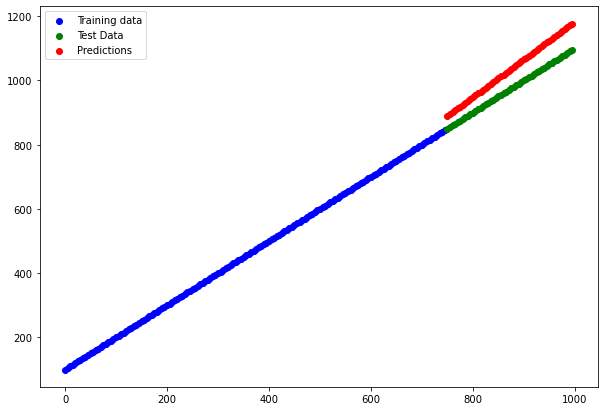

In [16]:
y_reg_preds = reg_model.predict(X_reg_test)

plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")

plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [17]:
# model_ Non Linearity
from tensorflow.keras.optimizers.legacy import Adam

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(2, input_shape=(None, 1))#,activation=tf.keras.activations.relu),
    #tf.keras.layers.Dense(4, input_shape=(None, 1),activation=tf.keras.activations.relu)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=Adam(),
                metrics=["accuracy"]
)

#model_2.fit(X, y, epochs=100)
#model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

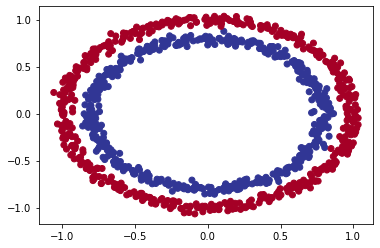

In [32]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [18]:
plot_decision_boundary(model=model_2,
                        X=X,
                      y=y)

NameError: name 'model_2' is not defined

In [19]:
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

NameError: name 'model_2' is not defined

In [20]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["accuracy"])

model_3.fit(X, y, epochs=100)
#model_3.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.1636 - accuracy: 0.2970
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 2.6656 - accuracy: 0.1860
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5655 - accuracy: 0.1580
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5408 - accuracy: 0.1960
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5235 - accuracy: 0.1890
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 2.5095 - accuracy: 0.2140
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 2.4982 - accuracy: 0.2380
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.4879 - accuracy: 0.2600
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 2.4784 - accuracy: 0.3510
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 2.4682 - accuracy: 0.3650
Epoch 11/

32/32 [==============================] - 0s 4ms/step - loss: 2.1666 - accuracy: 0.6160
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1742 - accuracy: 0.5120
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1644 - accuracy: 0.5320
Epoch 86/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1917 - accuracy: 0.4360
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1675 - accuracy: 0.6400
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1797 - accuracy: 0.5680
Epoch 89/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1628 - accuracy: 0.7080
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1554 - accuracy: 0.6310
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1497 - accuracy: 0.6180
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 2.1638 - accuracy: 0.5530
Epoch 93/100


In [21]:
#Imporoved classificaton model

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 0.6944 - accuracy: 0.5010
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6934 - accuracy: 0.5060
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5050
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5060
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6914 - accuracy: 0.5060
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6910 - accuracy: 0.5080
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5070
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6902 - accuracy: 0.5070
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5070
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5070
Epoch 11/

32/32 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.8460
Epoch 84/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5255 - accuracy: 0.8310
Epoch 85/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5194 - accuracy: 0.8540
Epoch 86/100
32/32 [==============================] - 0s 5ms/step - loss: 0.5151 - accuracy: 0.8450
Epoch 87/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.8420
Epoch 88/100
32/32 [==============================] - 0s 4ms/step - loss: 0.5048 - accuracy: 0.8490
Epoch 89/100
32/32 [==============================] - 0s 5ms/step - loss: 0.4993 - accuracy: 0.8500
Epoch 90/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4951 - accuracy: 0.8560
Epoch 91/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4905 - accuracy: 0.8630
Epoch 92/100
32/32 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.8580
Epoch 93/100


In [22]:
model_4.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8950


[0.4241366684436798, 0.8949999809265137]

313/313 [==============================] - 1s 2ms/step
Binary Classification


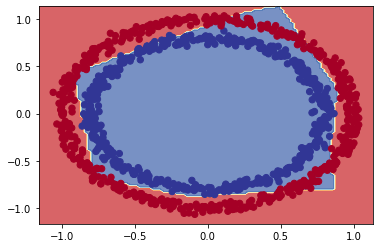

In [23]:
plot_decision_boundary(model_4, X=X, y=y)

# Linear and Non-Linear in action

In [24]:
#Linear

A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

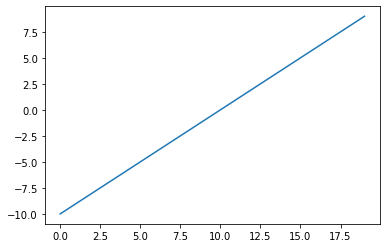

In [25]:
plt.plot(A)

In [26]:
# Sigmoid from scratch

def sigmoid(x):
    return 1/(1+tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

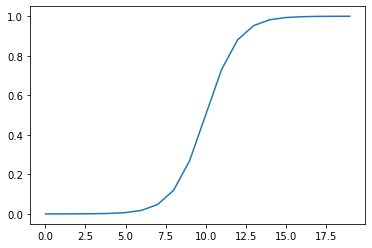

In [27]:
plt.plot(sigmoid(A))

([<matplotlib.lines.Line2D at 0x7f8b439f8100>],
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
       dtype=float32)>,
 <tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
        7., 8., 9.], dtype=float32)>)

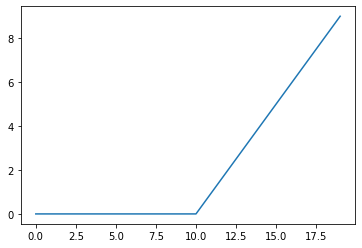

In [28]:
# Relu from scratch

def Relu(x):
    return tf.maximum(0, x)

plt.plot(Relu(A)), A, Relu(A)


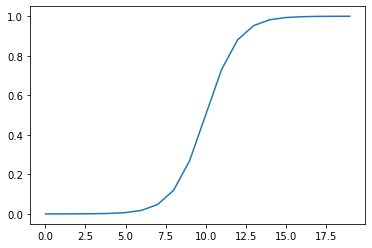

In [29]:
# Trying Linear into Sigmoid LOL

sigiLin = tf.keras.activations.linear(sigmoid(A))
plt.plot(sigiLin)

In [30]:
len(X), len(y)

(1000, 1000)

In [31]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [32]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
               metrics=["accuracy"]) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_5.fit(X_train, y_train, epochs=50, callbacks=[lr_scheduler])

Epoch 1/50
25/25 [==============================] - 1s 4ms/step - loss: 0.7625 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7598 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7570 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7508 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7441 - accuracy: 0.5013 - lr: 1.9953e-04
Epoch 8/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7407 - accuracy: 0.5013 - lr: 2.2387e-04
Epoch 9/50
25/25 [==============================] - 0s 4ms/step - loss: 0.7371 -

In [33]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9100


[0.26577141880989075, 0.9100000262260437]

313/313 [==============================] - 1s 2ms/step
Binary Classification


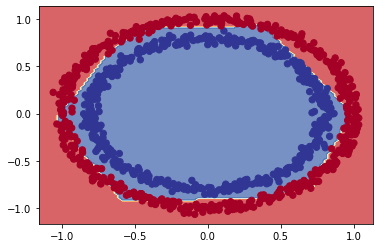

In [34]:
plot_decision_boundary(model=model_5, X=X, y=y)

313/313 [==============================] - 1s 2ms/step
Binary Classification


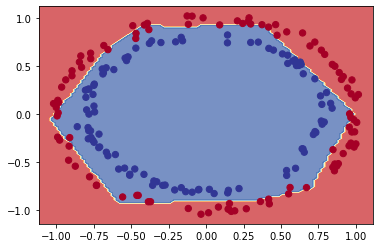

In [35]:
plot_decision_boundary(model=model_5, X=X_test, y=y_test)

In [36]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 12        
                                                                 
 dense_12 (Dense)            (None, 4)                 20        
                                                                 
 dense_13 (Dense)            (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


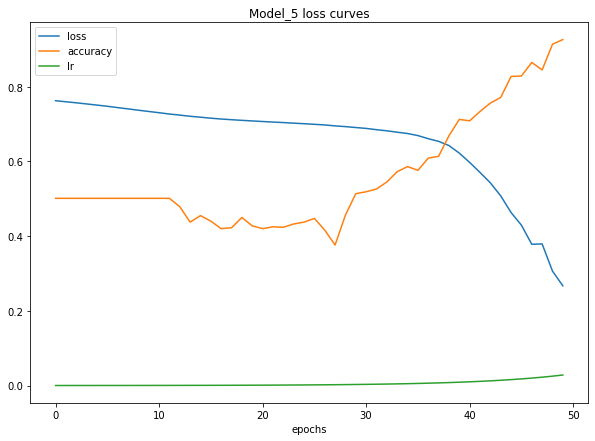

In [37]:
# Plot the loss curves

pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel="epochs")
plt.title("Model_5 loss curves");

Text(0.5, 1.0, 'Learning rate vs Loss')

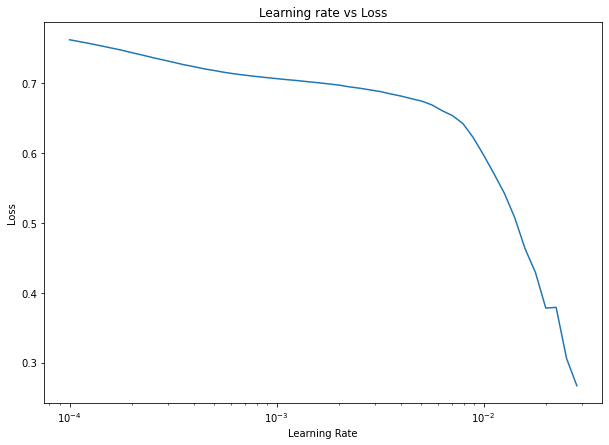

In [38]:
# Visualizing the learning rate process
lrs = 1e-4 * (10**(tf.range(50)/20))

plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

In [40]:
loss, accuracy = model_5.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.2658 - accuracy: 0.9100
Model loss on the test set: 0.26577141880989075
Model accuracy on the test set: 91.00%


In [44]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix

y_preds = model_5.predict(X_test) #the predict returns in prediction probability form (Sigmoid)


confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 2ms/step


array([[83, 18],
       [ 0, 99]])

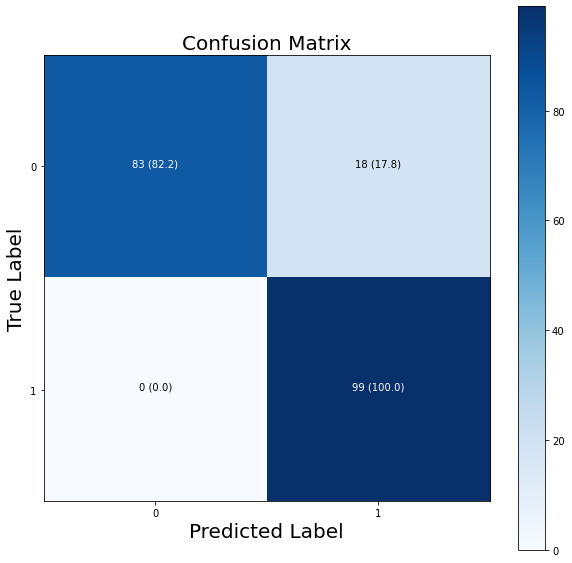

In [52]:
# Plot confusion matrix 
import itertools

figsize = (10, 10)

cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1) [:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])
    
ax.set(title="Confusion Matrix", xlabel="Predicted Label", ylabel="True Label", xticks=np.arange(n_classes), yticks=np.arange(n_classes), xticklabels=labels, yticklabels=labels)

ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)

threshold = (cm.max() + cm.min())/2.


for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f})", horizontalalignment="center",
             color="white" if cm [i, j] > threshold else "black")

# Multiclass classification

In [53]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [54]:
print(f"Training sample:\n{train_data[0]}")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [55]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

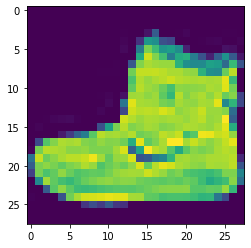

In [59]:
plt.imshow(train_data[0])

In [61]:
train_labels[0]

9

In [63]:
# list index for labels

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal","Shirt","Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Sandal')

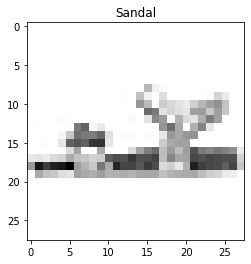

In [72]:
index_of_choice = 59999
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])


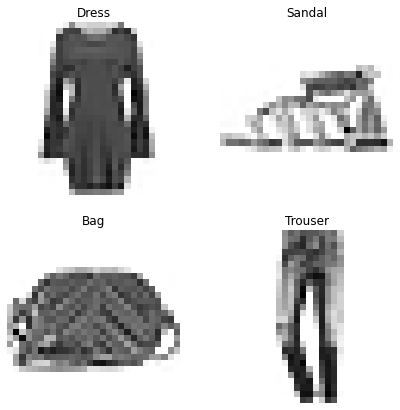

In [85]:
import random
plt.figure(figsize=(7,7))

for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)